In [9]:
# Importando bibliotecas
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Lendo datasets
animes = pd.read_csv('animes.csv')
animes.info()
profiles = pd.read_csv('profiles.csv', usecols=[0,1])
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   profile  81727 non-null  object
 1   gender   53856 non-null  object

In [11]:
# A tabela original estava tão suja que o pandas não lia, portanto foi feita uma limpeza preliminar
reviews = pd.read_csv('reviews_menos_sujo.csv', encoding='iso-8859-1', usecols=[0,1,2,3,4])
#reviews = pd.read_csv(r'')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192413 entries, 0 to 192412
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192394 non-null  object
 1   profile    192221 non-null  object
 2   anime_uid  192216 non-null  object
 3   score      192037 non-null  object
 4   scores     192034 non-null  object
dtypes: object(5)
memory usage: 7.3+ MB


C:\Users\simone.eline\AppData\Local\Temp\ipykernel_37904\4008697273.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('reviews_menos_sujo.csv', encoding='iso-8859-1', usecols=[0,1,2,3,4])


In [12]:
# Porém, a tabela permanece suja, visto que possui informações incongruentes com os seus campos
reviews[reviews.uid.str.isnumeric() != True].tail(2)

,uid,profile,anime_uid,score,scores
190263,holic attitude in contrast to his previous liv...,zenmodeman,26,NaN,NaN
192412,NaN,Scarlet012,1281,9.0,"{'Overall': '9', 'Story': '7', 'Animation': '8..."


In [13]:
reviews[reviews.profile.str.isnumeric() == True].tail(30)

,uid,profile,anime_uid,score,scores
165284,251596,161,18229,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9..."
165516,237917,770312,565,2.0,"{'Overall': '2', 'Story': '1', 'Animation': '1..."
166285,194262,1919191919,6707,6.0,"{'Overall': '6', 'Story': '7', 'Animation': '9..."
166639,103597,1231415333,101,1.0,"{'Overall': '1', 'Story': '1', 'Animation': '7..."
166643,5208,63883,32281,10.0,"{'Overall': '10', 'Story': '0', 'Animation': '..."
168032,189370,8,"{'Overall': '8', 'Story': '9', 'Animation': '8...",NaN,NaN
168056,209252,1928384756,23673,4.0,"{'Overall': '4', 'Story': '4', 'Animation': '6..."
168846,207048,711,4726,7.0,"{'Overall': '7', 'Story': '6', 'Animation': '7..."
169148,233359,7,"{'Overall': '7', 'Story': '10', 'Animation': '...",NaN,NaN
171387,132709,1928384756,3457,3.0,"{'Overall': '3', 'Story': '3', 'Animation': '4..."


In [14]:
# Descartando nulos, visto que compõem uma fração pequena da tabela
reviews_sem_na = reviews.dropna()
reviews_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192032 entries, 0 to 192411
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192032 non-null  object
 1   profile    192032 non-null  object
 2   anime_uid  192032 non-null  object
 3   score      192032 non-null  object
 4   scores     192032 non-null  object
dtypes: object(5)
memory usage: 8.8+ MB


In [15]:
# Porém as incongruências persistem
reviews_sem_na[reviews_sem_na.profile.str.isnumeric() == True].index

Int64Index([  3273,   3398,   4375,   4984,   6508,   6603,  10082,  10576,
             11409,  11720,
            ...
            177851, 179484, 181085, 181217, 181863, 183885, 184656, 188976,
            189968, 191566],
           dtype='int64', length=117)

In [16]:
# Aparentemente limpo
reviews_profile_limpo = reviews_sem_na.loc[
    reviews_sem_na[
        reviews_sem_na.profile.str.isnumeric() != True
        ].index]


reviews_limpo = reviews_profile_limpo.loc[
    reviews_profile_limpo[
        reviews_profile_limpo.anime_uid.str.isnumeric() == True
        ].index]

reviews_limpo['score'] = reviews_limpo.score.astype('float')

In [17]:
# Separando em colunas as chaves do dicionário scores
reviews_limpo['scores'] = reviews_limpo.scores.apply(ast.literal_eval)
for col in ['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']:
  reviews_limpo[col] = reviews_limpo.scores.apply(lambda x: x.get(col))

reviews_limpo = reviews_limpo.drop(columns=['scores', 'score'])
reviews_limpo[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']] = reviews_limpo[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']].astype(int)

In [18]:
# Limpo, será?
reviews_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191909 entries, 0 to 192411
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        191909 non-null  object
 1   profile    191909 non-null  object
 2   anime_uid  191909 non-null  object
 3   Overall    191909 non-null  int32 
 4   Story      191909 non-null  int32 
 5   Animation  191909 non-null  int32 
 6   Sound      191909 non-null  int32 
 7   Character  191909 non-null  int32 
 8   Enjoyment  191909 non-null  int32 
dtypes: int32(6), object(3)
memory usage: 10.2+ MB


In [19]:
# Isto
reviews_limpo[reviews_limpo.Overall > 10]

,uid,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment
119461,138941,LeBrains,413,11,11,11,11,11,11


In [20]:
reviews_limpo.head(2)

,uid,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,8,8,8,10,9,8
1,259117,baekbeans,34599,10,10,10,10,10,10


In [21]:
# Fazendo inner join com profiles, coluna uid dropada pois o join é feito no nome de usuário
reviews_profiles = reviews_limpo.merge(profiles, on='profile', how='inner').drop(columns='uid')
reviews_profiles['anime_uid'] = reviews_profiles.anime_uid.astype('int')

In [22]:
reviews_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479073 entries, 0 to 479072
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   profile    479073 non-null  object
 1   anime_uid  479073 non-null  int32 
 2   Overall    479073 non-null  int32 
 3   Story      479073 non-null  int32 
 4   Animation  479073 non-null  int32 
 5   Sound      479073 non-null  int32 
 6   Character  479073 non-null  int32 
 7   Enjoyment  479073 non-null  int32 
 8   gender     355840 non-null  object
dtypes: int32(7), object(2)
memory usage: 23.8+ MB


In [23]:
reviews_profiles.head(2)

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment,gender
0,DesolatePsyche,34096,8,8,8,10,9,8,Male
1,DesolatePsyche,34096,8,8,8,10,9,8,Male


In [24]:
# Convertendo genres para uma lista e explodindo a tabela em linhas com um gênero cada
animes['genre'] = animes.genre.apply(ast.literal_eval)
animes_explode = animes.explode('genre')

In [25]:
animes_explode.head(2)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Sports,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...


In [26]:
# Deletando colunas irrelevantes
animes_explode = animes_explode.drop(columns=['img_url', 'link', 'synopsis'])
animes_explode.info()
lista_genres = list(animes_explode.genre.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55663 entries, 0 to 19310
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         55663 non-null  int64  
 1   title       55663 non-null  object 
 2   genre       55581 non-null  object 
 3   aired       55663 non-null  object 
 4   episodes    53669 non-null  float64
 5   members     55663 non-null  int64  
 6   popularity  55663 non-null  int64  
 7   ranked      49579 non-null  float64
 8   score       53790 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.2+ MB


In [27]:
# Eliminando gêneros polêmicos e nulos
animes_explode_limpo = animes_explode.loc[animes_explode.genre.isin(lista_genres[0:-5])]
print(animes_explode_limpo.genre.unique())
animes_explode_limpo.info()

['Comedy' 'Sports' 'Drama' 'School' 'Shounen' 'Music' 'Romance' 'Sci-Fi'
 'Adventure' 'Mystery' 'Fantasy' 'Action' 'Military' 'Magic'
 'Supernatural' 'Vampire' 'Slice of Life' 'Demons' 'Historical'
 'Super Power' 'Mecha' 'Parody' 'Samurai' 'Seinen' 'Police'
 'Psychological' 'Josei' 'Space' 'Kids' 'Shoujo Ai' 'Ecchi' 'Shoujo'
 'Horror' 'Shounen Ai' 'Cars' 'Martial Arts' 'Game' 'Thriller' 'Dementia']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52415 entries, 0 to 19310
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         52415 non-null  int64  
 1   title       52415 non-null  object 
 2   genre       52415 non-null  object 
 3   aired       52415 non-null  object 
 4   episodes    50532 non-null  float64
 5   members     52415 non-null  int64  
 6   popularity  52415 non-null  int64  
 7   ranked      49159 non-null  float64
 8   score       50567 non-null  float64
dtypes: float64(3), int64(3), object(3)

In [28]:
# Inner join de reviews_profiles com animes_explode_limpo
df = reviews_profiles.merge(animes_explode_limpo, left_on='anime_uid', right_on='uid', how='inner')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3517217 entries, 0 to 3517216
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   profile     object 
 1   anime_uid   int32  
 2   Overall     int32  
 3   Story       int32  
 4   Animation   int32  
 5   Sound       int32  
 6   Character   int32  
 7   Enjoyment   int32  
 8   gender      object 
 9   uid         int64  
 10  title       object 
 11  genre       object 
 12  aired       object 
 13  episodes    float64
 14  members     int64  
 15  popularity  int64  
 16  ranked      float64
 17  score       float64
dtypes: float64(3), int32(7), int64(3), object(5)
memory usage: 415.9+ MB


In [30]:
df.tail(3)

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment,gender,uid,title,genre,aired,episodes,members,popularity,ranked,score
3517214,Rikudo134,1847,9,9,8,8,10,10,Male,1847,Rec: Yurusarezarumono,Drama,"Jun 30, 2006",1.0,20460,3155,2975.0,7.2
3517215,Rikudo134,1847,9,9,8,8,10,10,Male,1847,Rec: Yurusarezarumono,Romance,"Jun 30, 2006",1.0,20460,3155,2975.0,7.2
3517216,Rikudo134,1847,9,9,8,8,10,10,Male,1847,Rec: Yurusarezarumono,Seinen,"Jun 30, 2006",1.0,20460,3155,2975.0,7.2


In [31]:
df.head(2)

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment,gender,uid,title,genre,aired,episodes,members,popularity,ranked,score
0,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Action,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94
1,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Comedy,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94


In [32]:
# Copiando df com uma flag se música é um dos gêneros do anime
df_ismusic = df.copy()
df_ismusic['music_flag'] = df_ismusic['genre'] == 'Music'
df_ismusic.head(2)

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment,gender,uid,title,genre,aired,episodes,members,popularity,ranked,score,music_flag
0,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Action,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,False
1,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Comedy,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,False


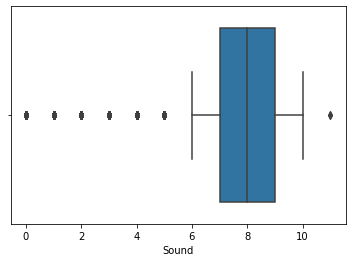

In [33]:
# As notas para a categoria Sound são maiores entre animes contendo o gênero música
sns.boxplot(data=df_ismusic, x='Sound', hue='music_flag', whis=0.85)
plt.show()


In [34]:
df.head()

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment,gender,uid,title,genre,aired,episodes,members,popularity,ranked,score
0,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Action,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94
1,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Comedy,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94
2,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Historical,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94
3,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Parody,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94
4,DesolatePsyche,34096,8,8,8,10,9,8,Male,34096,Gintama.,Samurai,"Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94


# Gráficos:


**Em primeiro lugar, vamos apresentar alguns dados da tabela para melhorar o entendimento dos gráficos.**

**O dataframe possui as seguintes colunas:**

1. 'profile' - nome do usuário que fez a avaliação.
2. 'anime_uid' - ID dos animes.
3. 'Overall' - média das notas recebidas nos outros tópicos.
4. 'Story' - critério de avaliação.
5. 'Animation' - critério de avaliação.
6. 'Sound' - critério de avaliação.
7. 'Character' - critério de avaliação.
8. 'Enjoyment' - critério de avaliação.
9. 'gender' - gênero do usuário.
10. 'uid' - ID.
11. 'title' - título do anime.
12. 'genre' - subgênero ao qual o anime pertence.
13. 'aired' - intervalo de exibição do anime.
14. 'episodes' - quantidade de episódios.
15. 'members' - quantidade de usuários que fazem parte da comunidade do anime.
16. 'popularity' - ranking dos animes por quantidade de membros.
17. 'ranked' - classificação geral.
18. 'score' - nota geral do anime.



Alguns dados relevantes:
1) Quantidade de 'profiles' únicos presentes na tabela: **47327**
2) Quantidade de animes avaliados: **7406**
3) Quantidade de subgêneros de anime: **39**
4) Critérios de avaliação individuais: 
    - 'Overall'
    - 'Story'
    - 'Animation' 
    - 'Sound'
    - 'Character'
    - 'Enjoyment'

In [35]:
quantidade_perfil_unico = df['profile'].nunique()
print("Quantidade de perfis:", quantidade_perfil_unico)

quantidade_animes_unico = df['anime_uid'].nunique()
print("Quantidade de animes:", quantidade_animes_unico)


Quantidade de perfis: 47327
Quantidade de animes: 7406


## 1


- Qual a distribuição de usuários por gênero:
Temos duas opções para mostrar esse análise, gráfico de setores(circular) e um histograma. 

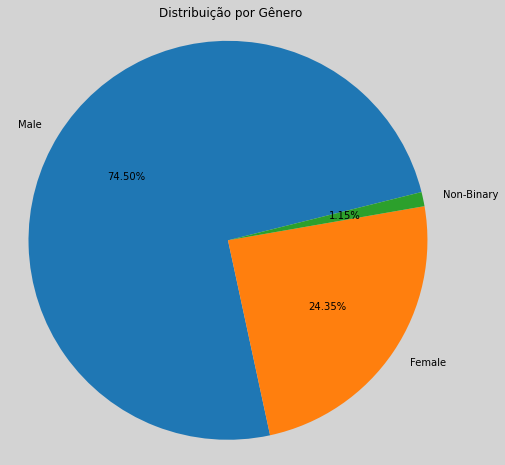

In [36]:
# Contar ocorrência de cada gênero na coluna 'gender'
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8), facecolor='lightgrey')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', startangle=14)
plt.axis('equal') 
plt.title('Distribuição por Gênero')
plt.show()

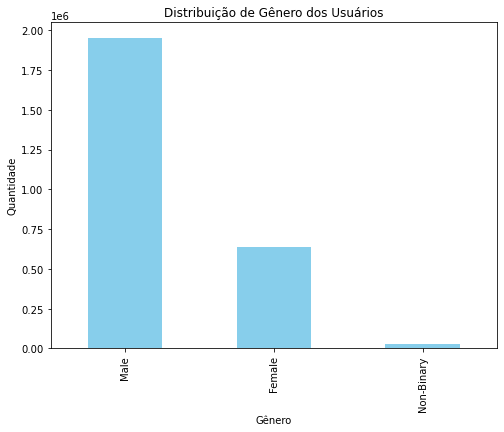

In [37]:
genero_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Gênero dos Usuários')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.show()


**Com este último gráfico, é possível perceber um erro, pois a quantidade total de usuários é de 47327 e, neste gráfico, as quantidades não correspondem. A solução é que, no dataframe, o mesmo usuário pode aparecer várias vezes. Portanto, devemos fazer a contagem dos perfis únicos.**

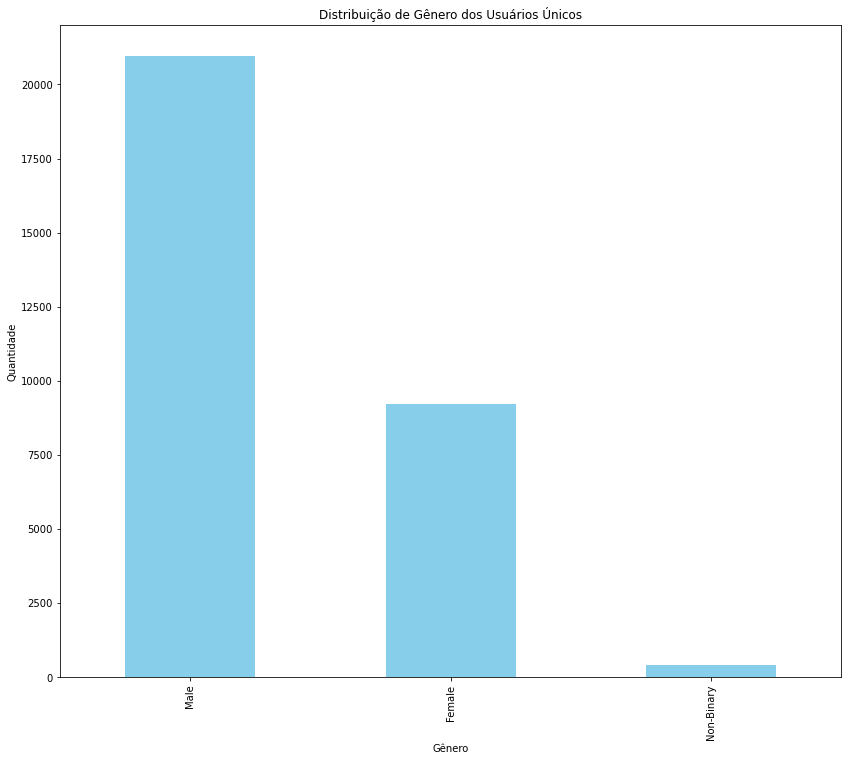

In [38]:
# Remover duplicatas de perfis para contar cada usuário uma vez
perfis_unicos = df.drop_duplicates(subset='profile')

genero_counts = perfis_unicos['gender'].value_counts()
plt.figure(figsize=(14, 12))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Gênero dos Usuários Únicos')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.show()

**Mesmo assim , a quantidade total de usuários por gênero não atinge os 47327 , isso ocorre pois uma quantidade considerável de usuários não forneceu o gênero, assim, não participando da contagem para o gráfico**

## 2

Nessa análise foi feito um gráfico de setores com todos os tipos de animes especificados no dataframe


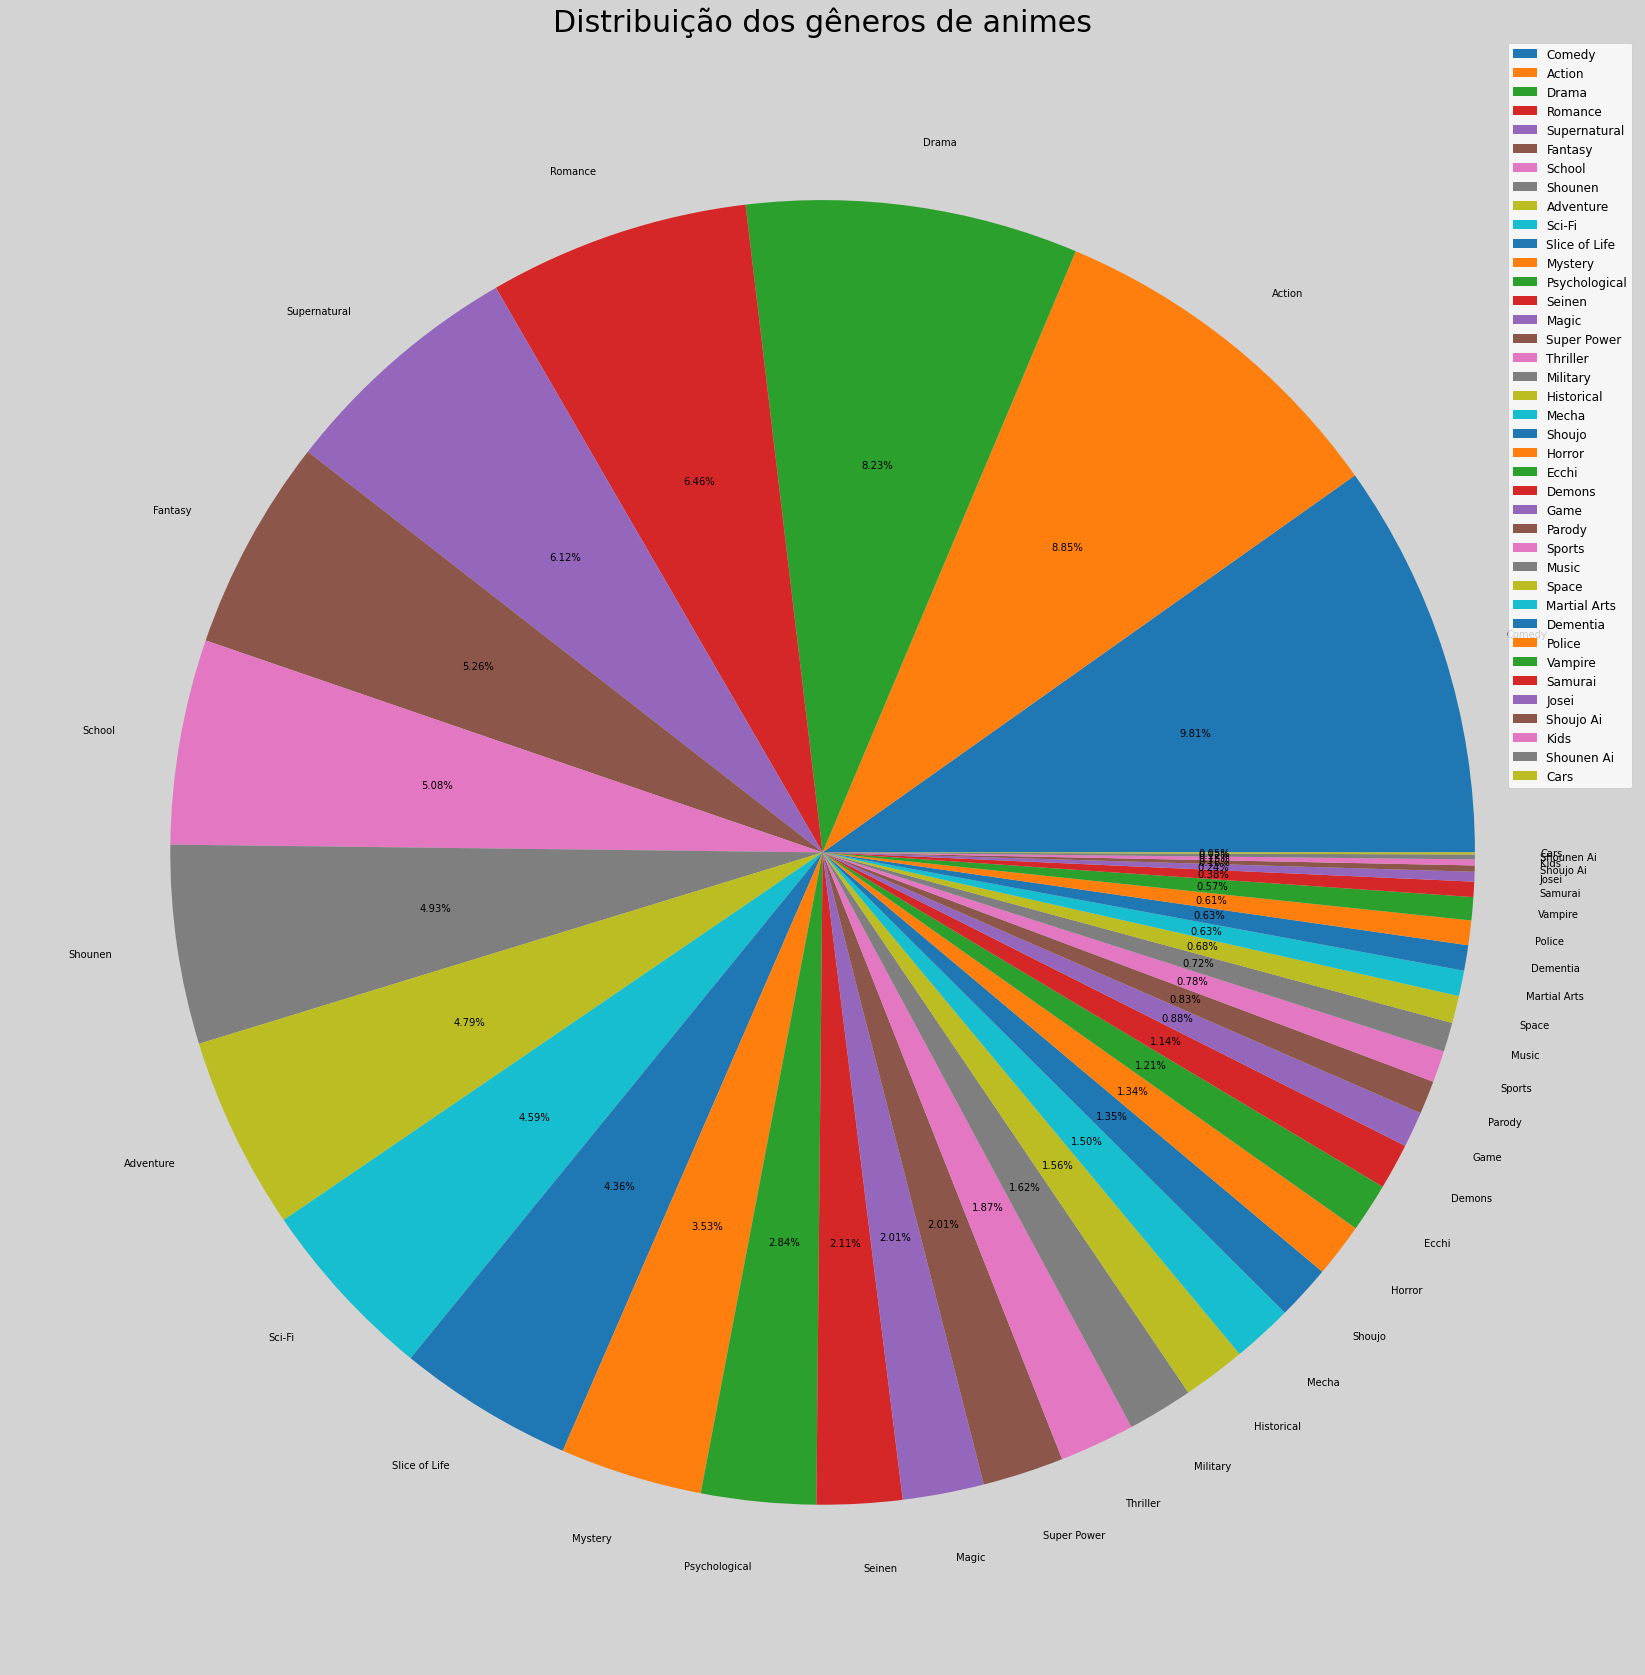

In [39]:
# Contar ocorrência de cada categoria na coluna 'genre'
genre_counts = df['genre'].value_counts()

tamanho_fonte = 12
plt.figure(figsize=(30, 30), facecolor='lightgrey')
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.2f%%', startangle=0)
plt.title('Distribuição dos gêneros de animes', fontsize=30)  # Tamanho da fonte do título
plt.legend(loc='upper right',fontsize = tamanho_fonte)
plt.show()


**Como resultado, obtivemos um gráfico com muitos dados e, principalmente, mais de 15 categorias que possuem menos de 1%. Por isso, refizemos o gráfico com a seguinte implementação: as categorias minoritárias foram aglomeradas em uma categoria chamada "outros" para ajudar na visualização do gráfico.**

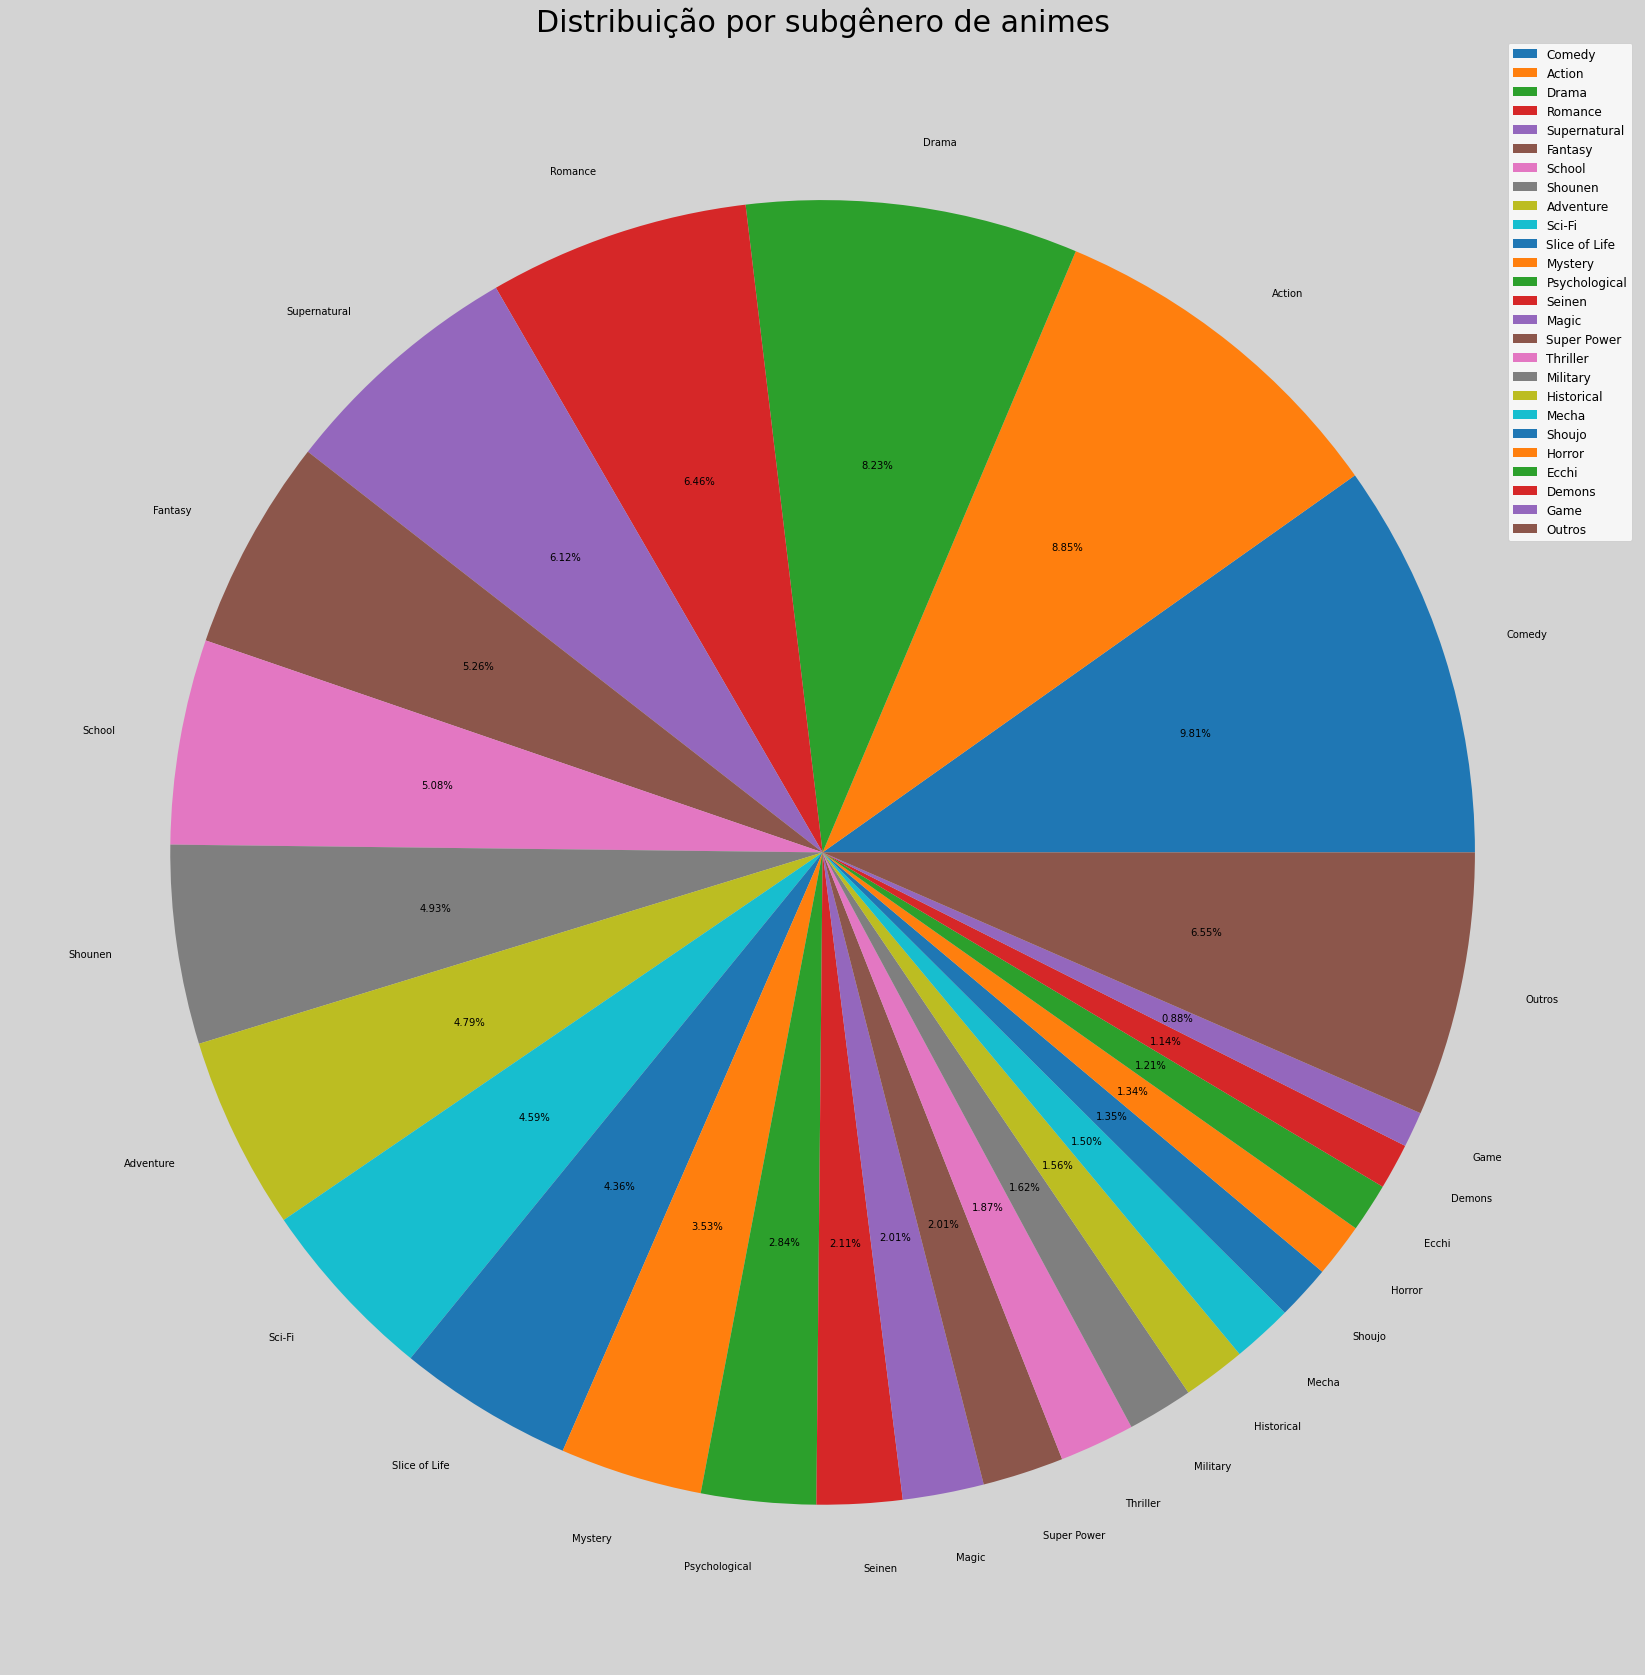

In [40]:
genre_counts = df['genre'].value_counts()

if len(genre_counts) > 10:
    outros_count = genre_counts.iloc[25:].sum()
    genre_counts = genre_counts.iloc[:25]
    genre_counts['Outros'] = outros_count

tamanho_fonte = 12
plt.figure(figsize=(30, 30), facecolor='lightgrey')
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.2f%%', startangle=0)
plt.title('Distribuição por subgênero de animes', fontsize=30) 
plt.legend(loc='upper right',fontsize = tamanho_fonte)
plt.show()


Desse gráfico, podemos inferir algumas informações importantes.
1. Comédia, ação e drama são, respectivamente, os tipos de animes mais frequentes nessa análise. Isso significa que, dentre todos os animes disponíveis na lista, essas categorias são as mais comuns. Contudo, o fato de essas categorias estarem no topo da distribuição não necessariamente indica que são as mais populares.

Para verificar se essas categorias são as mais populares, vamos realizar uma análise considerando a popularidade dos animes e suas categorias.
Neste dataframe, podemos observar a popularidade dos animes em relação ao subgênero por meio de duas relações entre três colunas:
1. A relação entre 'genre' e 'popularity'.
2. A relação entre 'genre' e 'members'.


## 3

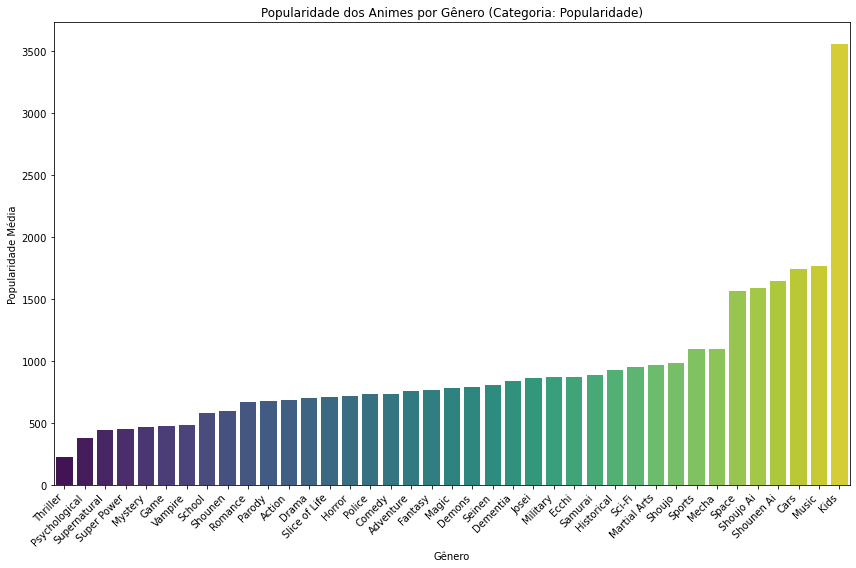

In [41]:
# Calcular a média de popularidade por subgênero
media_popularidade = df.groupby('genre')['popularity'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=media_popularidade.index, y=media_popularidade.values, palette='viridis')
plt.title('Popularidade dos Animes por Gênero (Categoria: Popularidade)')
plt.xlabel('Gênero')
plt.ylabel('Popularidade Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


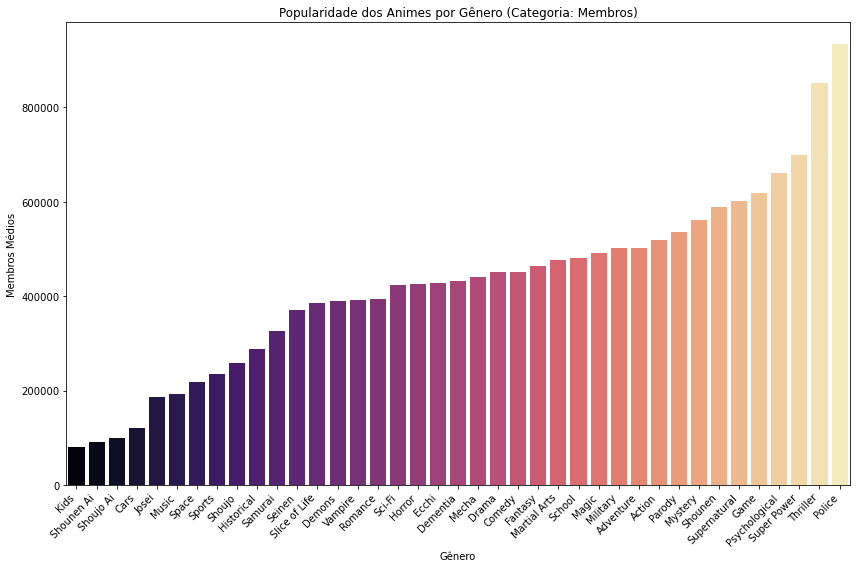

In [42]:
# Calcular a média de membros por subgênero
media_members = df.groupby('genre')['members'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=media_members.index, y=media_members.values, palette='magma')
plt.title('Popularidade dos Animes por Gênero (Categoria: Membros)')
plt.xlabel('Gênero')
plt.ylabel('Membros Médios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Com esses dois gráficos, percebemos uma inconsistência nos dados, pois apesar de representarem relações diferentes, ambas deveriam apontar para o mesmo resultado. A explicação para isso é que a coluna de popularidade organiza os dados de forma ordinal, ou seja, os animes com os menores valores nessa categoria são os mais populares. No entanto, o gráfico produzido inverte essa relação, tornando os animes com maiores valores nessa coluna os mais populares, em vez dos menos populares. Para lidar com essa inconsistência, tivemos que realizar outra análise levando isso em conta.

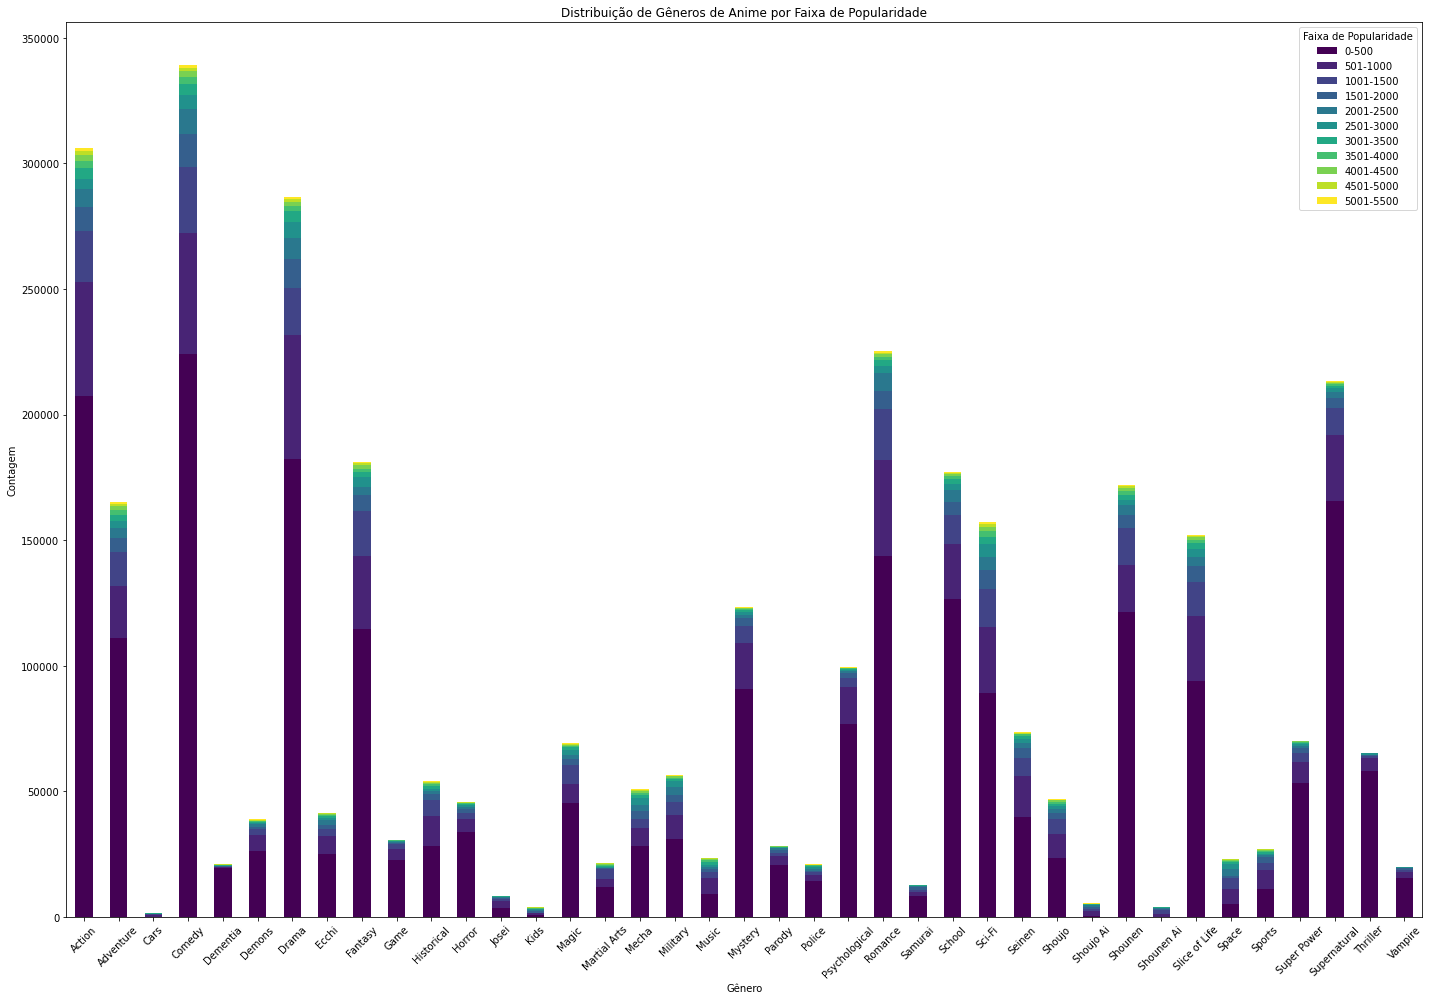

In [43]:
# Definir os limites para as faixas de popularidade
faixas_popularidade = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

# Criar uma coluna 'popularity_range' com as faixas de popularidade
df['popularity_range'] = pd.cut(df['popularity'], bins=faixas_popularidade, labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000', '5001-5500'])

contagem_genero_popularidade = df.groupby(['genre', 'popularity_range']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(20, 14))
contagem_genero_popularidade.plot(kind='bar', stacked=True, cmap='viridis', ax=ax)
ax.set_title('Distribuição de Gêneros de Anime por Faixa de Popularidade')
ax.set_xlabel('Gênero')
ax.set_ylabel('Contagem')
ax.tick_params(axis='x', rotation=45)

# Adicionar legenda
ax.legend(title='Faixa de Popularidade')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


O gráfico apresentado acima é conhecido como gráfico de barras empilhadas, devido a complexidade vamos explicar o básico:

1. **Faixas de Popularidade:**
   - No eixo x do gráfico, temos os diferentes subgêneros de anime.
   - No eixo y, temos a contagem de animes em cada faixa de popularidade. As faixas de popularidade são definidas previamente, com base nos valores na coluna 'popularity'.
   - Cada barra representa um gênero de anime e é dividida em segmentos coloridos, onde cada cor representa uma faixa de popularidade.

2. **Interpretação:**
   - Podemos visualizar como a popularidade dos animes está distribuída entre os diferentes gêneros.
   - A altura total de cada barra representa o total de animes para o respectivo gênero.
   - Os segmentos coloridos dentro de cada barra representam a distribuição desses animes em diferentes faixas de popularidade. Por exemplo, se um segmento laranja é mais alto do que os outros para um determinado gênero, isso indica que a maioria dos animes desse gênero está na faixa de popularidade correspondente.
   - O empilhamento das barras permite comparar a distribuição de popularidade entre os gêneros. Se uma barra tem mais segmentos de cores mais escuras, indicando popularidade mais alta, isso sugere que os animes desse gênero tendem a ser mais populares em comparação com outros gêneros.


O que podemos perceber deste gráfico é que o gênero supernatural é um dos mais populares. Além do grande número de animes que compõem essa categoria, notamos que a maioria deles está dentro das faixas azuis mais escuras, que correspondem às que possuem os melhores desempenhos de popularidade. Contudo, ao analisarmos todos os animes em suas respectivas categorias, percebemos que a distribuição é bastante equilibrada. 

Outro ponto interessante neste gráfico é a semelhança com o gráfico que relaciona o gênero com a quantidade de membros. Os subgêneros menos populares naquele gráfico são os mesmos neste, e isso também se aplica aos mais populares.

## 4



Agora vamos realizar uma relação mais complexa: uma matriz de correlação. Nessa matriz, tentamos encontrar correlações entre os critérios de avaliação individual do anime. Esta matriz varia de 0.5 a 1 e, quanto mais próximo de 1, significa que os dois critérios possuem mais afinidade no quesito nota.

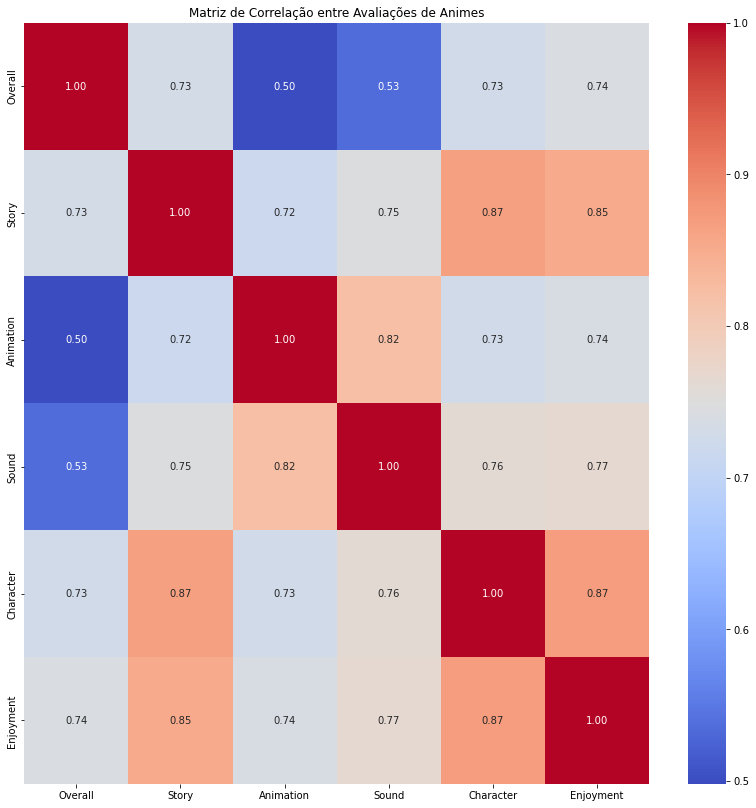

In [44]:
avaliacoes_animes = df[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']]

# Calcular a matriz de correlação
matriz_correlacao = avaliacoes_animes.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Avaliações de Animes')
plt.show()


**O que podemos observar nesta matriz, primeiramente, é que a nota atribuída à animação e ao som não necessariamente influenciam na média geral. Contudo, a história possui uma relação mais íntima com os personagens e a diversão da obra.**

# 5


Agora vamos retornar à popularidade dos animes usando a quantidade de membros como referência e criar um gráfico de dispersão para determinar se os animes com notas mais altas são mais populares.

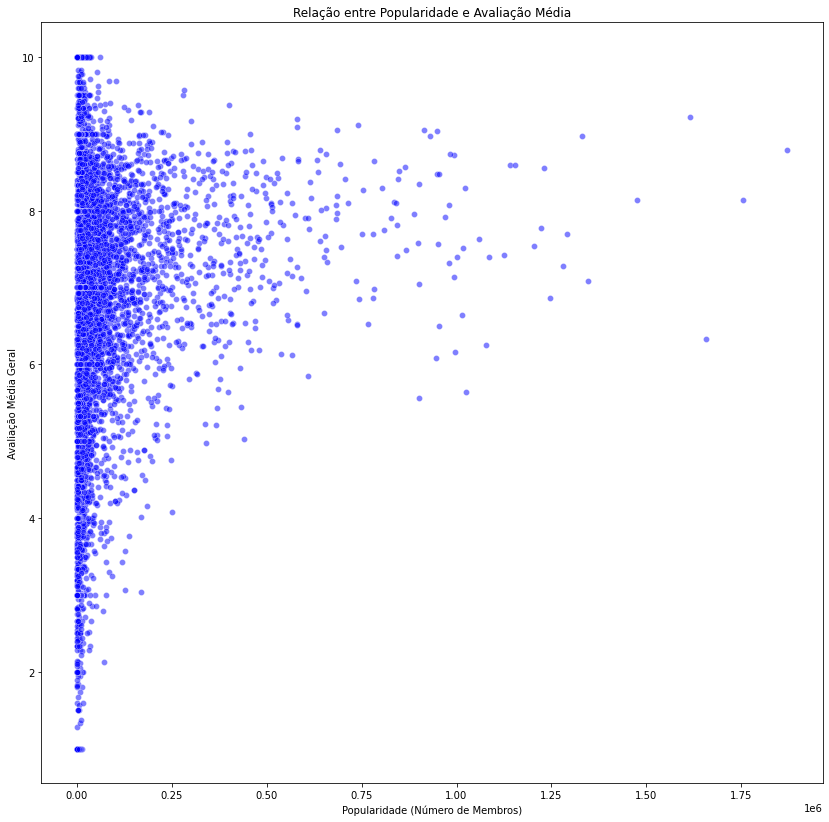

In [45]:
media_avaliacao = df.groupby('title')['Overall'].mean()
popularidade = df.groupby('title')['members'].mean()

plt.figure(figsize=(14, 14))
sns.scatterplot(x=popularidade, y=media_avaliacao, color='blue', alpha=0.5)
plt.title('Relação entre Popularidade e Avaliação Média')
plt.xlabel('Popularidade (Número de Membros)')
plt.ylabel('Avaliação Média Geral')
plt.show()

Esse gráfico não apresenta muitas informações relevantes, pelo menos em relação ao questionamento levantado. No entanto, podemos perceber algumas características interessantes. A grande maioria dos animes se concentra abaixo de 250.000 membros, uma massa considerável entre 250.000 e 1.000.000, e os que ultrapassam essa média são praticamente outliers devido à baixa quantidade.

**O que chamou atenção foi um dos animes mais populares por quantidade de membros possuir uma nota próxima de 6. Então, vamos descobrir quais são esses animes.**

In [46]:
# Filtrar o DataFrame para incluir apenas animes com mais de 1.500.000 de membros
animes_populares = df[df['members'] > 1500000]

media_avaliacao = animes_populares.groupby('title')['Overall'].mean().sort_values(ascending=False)
quantidade_members = animes_populares.groupby('title')['members'].mean().sort_values(ascending=False)
resultado = pd.concat([media_avaliacao, quantidade_members], axis=1)
resultado.columns = ['Nota Média', 'Quantidade de Membros']
print(resultado)


                                  Nota Média  Quantidade de Membros
title                                                              
Fullmetal Alchemist: Brotherhood    9.218601              1615084.0
Death Note                          8.788452              1871043.0
Shingeki no Kyojin                  8.142857              1754979.0
Sword Art Online                    6.334171              1657823.0


**Com essa breve pesquisa descobrimos o anime Sword Art Online como o correspondente a última pergunta**

Agora vamos explorar os principais animes com mais de 1000000 de membros:

In [47]:
# Filtrar o DataFrame para incluir apenas animes com mais de 1.000.000 de membros
animes_populares = df[df['members'] > 1000000]

media_avaliacao = animes_populares.groupby('title')['Overall'].mean().sort_values(ascending=False)
quantidade_members = animes_populares.groupby('title')['members'].mean().sort_values(ascending=False)
resultado = pd.concat([media_avaliacao, quantidade_members], axis=1)
resultado.columns = ['Nota Média', 'Quantidade de Membros']
print(resultado)


                                       Nota Média  Quantidade de Membros
title                                                                   
Fullmetal Alchemist: Brotherhood         9.218601              1615084.0
Steins;Gate                              8.965971              1331710.0
Death Note                               8.788452              1871043.0
Toradora!                                8.590811              1153720.0
Kimi no Na wa.                           8.586747              1139878.0
Code Geass: Hangyaku no Lelouch          8.550044              1231546.0
Boku no Hero Academia 2nd Season         8.295820              1023413.0
Shingeki no Kyojin                       8.142857              1754979.0
One Punch Man                            8.131944              1475219.0
Boku no Hero Academia                    7.776471              1223690.0
No Game No Life                          7.699286              1291615.0
Naruto: Shippuuden                       7.635983  

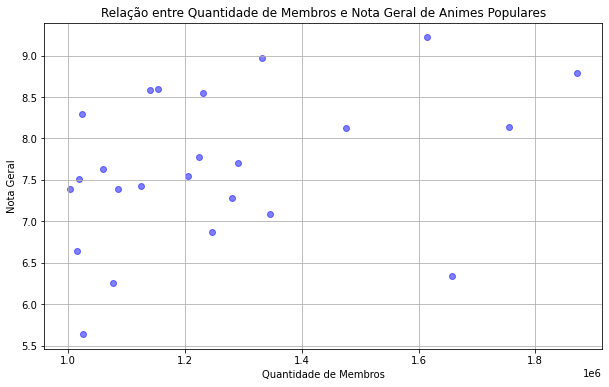

In [48]:
animes_populares = df[df['members'] > 1000000]
media_avaliacao = animes_populares.groupby('title')['Overall'].mean()
quantidade_members = animes_populares.groupby('title')['members'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(quantidade_members, media_avaliacao, color='blue', alpha=0.5)
plt.title('Relação entre Quantidade de Membros e Nota Geral de Animes Populares')
plt.xlabel('Quantidade de Membros')
plt.ylabel('Nota Geral')
plt.grid(True)
plt.show()

O gráfico de dispersão acima mostra a nota dos animes mais populares. Podemos observar que existem mais animes com notas abaixo de 7 do que animes com notas acima de 9. A nota média deles fica em torno de 7.5, mostrando que os animes com grandes comunidades não necessariamente possuem as melhores notas de avaliação.

## Média da popularidade ao longo dos anos

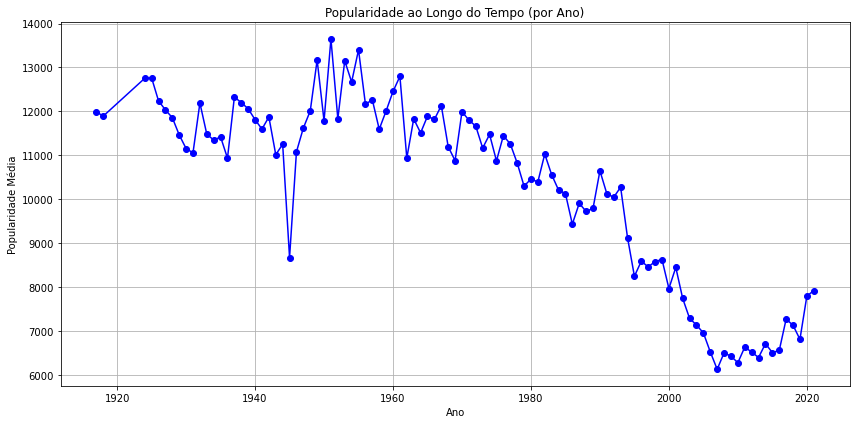

In [67]:
# Filtro de valores que tem quatro dígitos para o ano
filtro_ano_4 = animes['aired'].str.match(r'.*([12]\d{3})$', na=False)

# Filtrando somente os dados com informação de ano com 4 dígitos
animes = animes[filtro_ano_4]

# Extraindo apenas o ano da coluna 'aired'
animes['ano'] = animes['aired'].str[-4:].astype(int)

# Agrupando dados por ano e calculando a média da popularidade
popularidade_por_ano = animes.groupby('ano')['popularity'].mean()

# Gráfico de popularidade por ano
plt.figure(figsize=(12, 6))
popularidade_por_ano.plot(marker='o', color='b', linestyle='-')
plt.title('Popularidade ao Longo do Tempo (por Ano)')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid(True)
plt.tight_layout()
plt.show()